In [ ]:
import os
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/RBLproject/content/train/stock_data.csv')

display(data)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


**Preprocessing**

In [ ]:

def Preprocess_Tweets(data):

  data['Text_Cleaned'] = data['Text'].str.lower()

	## FIX HYPERLINKS
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'https?:\/\/.*[\r\n]*', ' ',regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'www.*[\r\n]*', ' ',regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('https', '', regex=False)


	## FIX INDIVIDUAL SYMBOLS
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(': ', ' ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(', ', ' ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('. ', ' ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[;\n~]', ' ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace("[]'â€¦*™|]", '', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[[()!?"]', '', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('_', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('w/', ' with ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('f/', ' for ', regex=False)


	## FIX EMOJIS
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':)', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':-)', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':(', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':-(', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('0_o', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(';)', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('=^.^=', '', regex=False)


	## FIX % SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('%', ' percent ', regex=False)


	## FIX & SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' & ', ' and ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&amp', ' and ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&gt', ' greater than ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('cup&handle', 'cup and handle', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('c&h', 'cup and handle', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('head&shoulders', 'head and shoulders', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('h&s', 'head and shoulders', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('point&figure', 'point and figure', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('p&f', 'point and figure', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('s&p', 'SP500', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('q&a', 'question and answer', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&', ' and ', regex=False)


	## FIX USER TAGS AND HASTAGS
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('@[a-z0-9]+', '', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('#[a-z0-9]+', '', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('@', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('#', '', regex=False)


	## FIX EMBEDDED COMMAS AND PERIODS
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z]),([a-z])', r'\1 \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]),([0-9])', r'\1\2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])[+]+', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(',', '', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('u.s.', ' us ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('\.{2,}', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])\.([a-z])', r'\1 \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('pdating', 'updating', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])\.', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'\.([a-z])', r' \1', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' . ', ' ', regex=False)


	## FIX + SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'[+]([0-9])', r'positive \1', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('c+h', 'cup and handle', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('h+s', 'head and shoulders', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('cup+handle', 'cup and handle', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' + ', ' and ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('+ ', ' ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])[+]([a-z])', r'\1 and \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('+', '', regex=False)




	## FIX - SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])[-]+([a-z])', r'\1 \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z]) - ([a-z])', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]) -([0-9\.])', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r' [-]([0-9])', r' negative \1', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])-([0-9\.])', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]) - ([0-9\.])', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9a-z])-([0-9a-z])', r'\1 \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[-]+[>]', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [-]+ ', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('-', ' ', regex=False)



	## FIX $ SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[$][0-9\.]', ' dollars ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('$', '', regex=False)


	## FIX = SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('=', ' equals ', regex=False)


	## FIX / SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/c', ' because ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/out', ' break out ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/o', ' break out ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('p/e', ' pe ratio ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [/]+ ', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/2 ', ' .5 ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/4 ', ' .25 ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 3/4 ', ' .75 ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/3 ', ' .3 ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 2/3 ', ' .6 ', regex=False)

  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[/]{2,}', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])/([a-z])', r'\1 and \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+/[0-9]+/[0-9]+', '', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]{3,})/([0-9\.]{2,})', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]{2,})/([0-9\.]{3,})', r'\1 to \2', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[a-z0-9]+/[a-z0-9]+', ' ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('/', '', regex=False)


	## FIX < > SYMBOLS
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[<]+ ', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('<', ' less than ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [>]+', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('>', ' greater than ', regex=False)


	## FIX : SYMBOL
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+:[0-9]+am', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+:[0-9]', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':', ' ', regex=False)


	## FIX UNITS
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('user ', ' ', regex=False)

  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)dma', r'\1 displaced moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'dma([0-9]+)', r'\1 displaced moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)sma', r'\1 simple moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'sma([0-9]+)', r'\1 simple moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)ema', r'\1 expontential moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'ema([0-9]+)', r'\1 expontential moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)ma', r'\1 moving average ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'ma([0-9]+)', r'\1 moving average ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mos', r'\1 months ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])minute', r'\1 minute ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])minutes', r'\1 minutes ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])min', r'\1 minute ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mins', r'\1 minutes ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])day', r'\1 day ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])days', r'\1 days ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])wk', r'\1 week ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' wk ', ' week ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' wknd ', ' weekend ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])wks', r'\1 weeks ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])hours', r'\1 hours ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])hour', r'\1 hour ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])yr', r'\1 year ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])yrs', r'\1 years ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' yr', ' year ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])am', r'\1 am ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])pm', r'\1 pm ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])est', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])ish', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9 ])pts', r'\1 points ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])x', r'\1 times ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])th', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])rd', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])st', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])nd', r'\1 ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('mrkt', 'market', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' vol ', ' volume ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' ptrend', ' positive trend ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' ppl', ' people ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' pts', ' points ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' pt', ' point ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' l(ol){1,}', ' laugh ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('imho', ' in my opinion ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('prev ', 'previous ', regex=True)


  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1q', ' first quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 2q', ' second quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 3q', ' third quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 4q', ' fourth quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q1', ' first quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q2', ' second quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q3', ' third quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q4', ' fourth quarter ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 10q ', ' form 10 ', regex=False)

  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])million', r'\1 million ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mil', r'\1 million ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' mil ', ' million ', regex=False)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])billion', r'\1 billion ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])cents', r'\1 cents ', regex=True)

  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])3d', r'\1 3 dimensional ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])gb', r'\1 3 gigabytes ', regex=True)



  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])c', r'\1 calls ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])y', r'\1 year ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])p', r'\1 puts ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])d', r'\1 days ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])h', r'\1 hour ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])s', r'\1 ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])k1', r'\1 thousand ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])k', r'\1 thousand ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])m', r'\1 million ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])b', r'\1 billion ', regex=True)


  data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])([a-z])', r'\1 \2', regex=True)

	## FIX EXTRA SPACES AND ENDING PUNCTUATION
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' +', ' ', regex=True)
  data['Text_Cleaned'] = data['Text_Cleaned'].str.strip(' .!?,)(:-')

  return data

In [ ]:
data = Preprocess_Tweets(data)

display(data)

/usr/local/lib/python3.10/dist-packages/pandas/core/strings/object_array.py:158: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

model = SentimentIntensityAnalyzer()

data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: model.polarity_scores(score)['compound'])

data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >= 0 else -1)

print('Vader Accuracy: ', round(len(data[data['Sentiment'] == data['Vader_Prediction']])/len(data)*100,2))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Vader Accuracy:  66.48


Other machine learning techniques

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

StopWords = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])

print(StopWords)

data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in StopWords]))
data['Text_Processed'] = data['Text_Processed'].str.strip()

display(data)

{'itself', 'wouldn', 'again', 'will', 'against', 'we', 'shan', 'there', 'werent', 'mustn', 'i', 'wont', 'hasn', 'of', 'before', 'mightn', 'other', 'doesnt', 'are', 'have', 'which', 'yours', 'after', 'shouldve', 'mightnt', 'here', 't', 'during', 'ain', 'has', 'myself', 'aren', 'his', 'who', 'didn', 'so', 'she', 'then', 's', 'should', 'you', 'where', 'any', 'can', 'do', 'an', 'why', 'nor', 'ours', 'arent', 'her', 'with', 'once', 'd', 'few', 'on', 'll', 'by', 'needn', 'themselves', 'my', 'their', 'hers', 'wouldnt', 'theirs', 'didnt', 'did', 'a', 'just', 've', 'won', 'youd', 'than', 'all', 'having', 'haven', 'in', 'between', 'into', 'youll', 'him', 'shant', 'same', 'me', 'had', 'youre', 'from', 'be', 'this', 'while', 'off', 'about', 'ourselves', 'out', 'wasn', 'doesn', 'that', 'or', 'been', 'hadn', 'what', 'he', 'couldn', 'both', 'mustnt', 'for', 'at', 'herself', 'your', 'they', 'weren', 'were', 'more', 'its', 'how', 'does', 'them', 'each', 'y', 'm', 'doing', 'shes', 'these', 'isn', 'haven

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction,Text_Processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,0.0000,1,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...,0.6249,1,aap movie 55 percent return fea geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...,0.3612,1,id afraid short amzn looking like near monopol...
3,MNTA Over 12.00,1,mnta over 12.00,0.0000,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37,0.0000,1,oi over 21.37
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said are likely to suffer a ...,-0.7003,-1,industry body cii said likely suffer net reven...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,prices slip below rs 46000 as book profits ami...,0.0258,1,prices slip below rs 46000 book profits amid l...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...,0.0000,1,workers bajaj auto agreed 10 percent wage cut ...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,live sensex off day’s high up 600 points tests...,0.0000,1,live sensex day’s high up 600 points tests 920...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # help encode our words so that we can pass it to the model
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
train_pct = .8
np.random.seed(1)
idx = np.random.permutation(len(data))

In [ ]:
x_train = data['Text_Processed'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]

y_train[y_train == -1] = 0

x_test = data['Text_Processed'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test == -1] = 0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(4632,) (4632,)
(1159,) (1159,)


1.0 0.8304


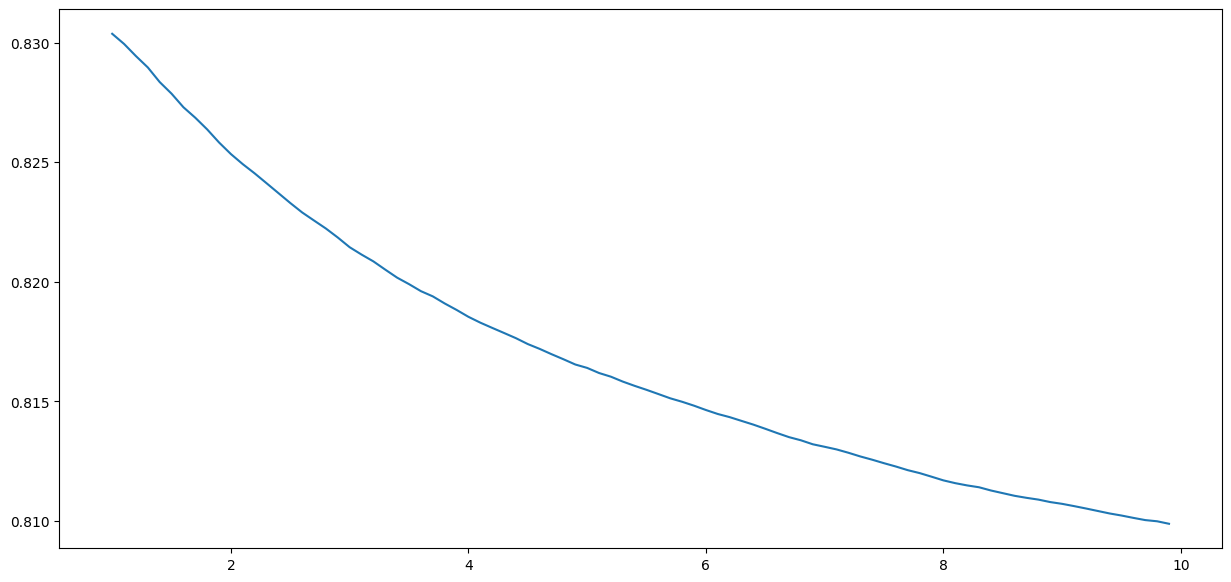

Naive Bayes Accuracy: 66.78


In [ ]:
# vectorizing the inputs so that it can be used by the model
tf_idf = TfidfVectorizer(ngram_range = (1,3), binary = True, smooth_idf = False)

x_train_tfidf = tf_idf.fit_transform(x_train)
x_test_tfidf = tf_idf.transform(x_test)

def cal_auc_cv(model):
  kf = StratifiedKFold(5, shuffle = True, random_state = 1)

  auc = cross_val_score(model, x_train_tfidf, y_train, scoring = 'roc_auc', cv = kf)
  # used to calculate the area under the curve, the greater the area the better is the fit

  return auc.mean()

# creating models with different alpha values
alphas = np.arange(1,10,0.1)

models = [MultinomialNB(alpha = i) for i in alphas]

accs = []
for model in models:
  accs.append(cal_auc_cv(model))

accs = np.array(accs)

best_alpha = round(alphas[accs.argmax()], 1)

print(best_alpha, round(accs.max(),4))

best_model = MultinomialNB(alpha =  best_alpha)
best_model.fit(x_train_tfidf, y_train)

probs = best_model.predict_proba(x_test_tfidf)
# print(probs)

plt.figure(figsize = (15,7))
plt.plot(alphas, accs)
plt.show()

print('Naive Bayes Accuracy:',round(len(np.where(y_test == probs.argmax(axis = 1))[0]) / len(probs)*100, 2))

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00


**Bert Sentiment Analysis**

In [ ]:
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/RBLproject/content/train/stock_data.csv')
data = Preprocess_Tweets(data)

train_pct = .8
np.random.seed(1)
idx = np.random.permutation(len(data))

x_train = data['Text_Cleaned'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]

y_train[y_train == -1] = 0

x_test = data['Text_Cleaned'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]

y_test[y_test == -1] = 0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

#display (data)

/usr/local/lib/python3.10/dist-packages/pandas/core/strings/object_array.py:158: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


(4632,) (4632,)
(1159,) (1159,)


In [ ]:
# encode the data in order to make it ready to fit into Bert
# state-of-the-art model

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)
# make use of the base pretrained model of bert and considering only the lower case as our text is converted to lower case

def preprocessing_for_bert(data):
  input_ids = []
  attention_masks = []

  for line in data:
    encoding = tokenizer.encode_plus(
        text = line,
        add_special_tokens = True,
        padding = 'max_length',
        max_length = MAX_LEN,
        truncation = True,
        return_tensors = 'pt',
        return_attention_mask = True
    )

    input_ids.append(encoding.get('input_ids'))
    attention_masks.append(encoding.get('attention_mask'))

  input_ids = torch.concat(input_ids)
  attention_masks = torch.concat(attention_masks)

  return input_ids, attention_masks

encoded = [tokenizer.encode(s, add_special_tokens = True) for s in data['Text_Cleaned'].values]
MAX_LEN = max([len(s) for s in encoded])
print('max length:', MAX_LEN)

max length: 53


In [ ]:
x_train_inputs, x_train_masks = preprocessing_for_bert(x_train)
x_test_inputs, x_test_masks = preprocessing_for_bert(x_test)

y_train_labels = torch.tensor(y_train)
y_test_labels = torch.tensor(y_test)

print(x_train_inputs.shape, x_train_masks.shape, y_train_labels.shape)
print(x_test_inputs.shape, x_test_masks.shape, y_test_labels.shape)

batch_size = 16

train_data = TensorDataset(x_train_inputs, x_train_masks, y_train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)
# creates a dataset that is the size of the batch size but also includes the training data that includes the training data that was randomly sampled

test_data = TensorDataset(x_test_inputs, x_test_masks, y_test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size = batch_size)
# creates a dataset that is the size of the batch size but also includes the testing data that includes the testing data that was randomly sampled

# we can increase the batch_size if we have higher GPU

torch.Size([4632, 53]) torch.Size([4632, 53]) torch.Size([4632])
torch.Size([1159, 53]) torch.Size([1159, 53]) torch.Size([1159])


BERT model

In [ ]:
class BertClassifier(nn.Module):
  def __init__(self, freeze = False):  # setup the parameters for the model
    super(BertClassifier, self).__init__()

    input_layer = 768
    hidden_layer = 50
    output_layer = 2

    self.bert = BertModel.from_pretrained('bert-base-uncased')

    self.classifier = nn.Sequential(
        nn.Linear(input_layer, hidden_layer),
        nn.ReLU(),
        nn.Linear(hidden_layer, output_layer)
    )

    if freeze:
      for param in self.bert.parameters():
        param.requires_grad = False

  def forward(self, input_ids, attention_masks):  # forcing it go through the bert and last layer
    outputs = self.bert(input_ids, attention_masks)
    h_cls = outputs[0][:, 0, :]
    logits = self.classifier(h_cls)
    return logits

torch.manual_seed(1)
torch.cuda.manual_seed_all(1) # going to use gpu
np.random.seed(1) # if numpy is used anywhere


# check cpu or gpu is used
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

# should initialise the model
model = BertClassifier(freeze = False)
model.to(device)

# should define the hyper parameters
epochs = 4
steps = len(train_dataloader) * epochs
learning_rate = 5e-5
epsilon = 1e-8

optimizer = AdamW(model.parameters(), lr = learning_rate, eps = epsilon)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = steps)

loss_function = nn.CrossEntropyLoss()


for e in range(epochs):
  model.train()

  train_loss = 0

  for batch in train_dataloader:
    batch_inputs, batch_masks, batch_labels = batch

    # masks inputs to gpu
    batch_inputs = batch_inputs.to(device)
    batch_masks = batch_masks.to(device)
    batch_labels = batch_labels.to(device)

    model.zero_grad() # get ready to train the model

    # pass inputs to the model to make the prediction

    logits = model(batch_inputs, batch_masks)

    loss = loss_function(logits, batch_labels)
    train_loss += loss.item()

    # update the model
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()

  train_loss /= len(train_dataloader)

  model.eval()

  test_loss = 0
  test_acc = 0

  for batch in test_dataloader:
    batch_inputs, batch_masks, batch_labels = batch

    # masks inputs to gpu
    batch_inputs = batch_inputs.to(device)
    batch_masks = batch_masks.to(device)
    batch_labels = batch_labels.to(device)

    with torch.no_grad():
      logits = model(batch_inputs, batch_masks)


    loss = loss_function(logits, batch_labels)
    test_loss += loss.item()

    preds = torch.argmax(logits, dim = 1)

    accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
    test_acc += accuracy

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

  print("Epoch : %d | Train Loss: %1.5f | Test Loss: %1.5f | Test Accuracy: %1.2f"%(e+1, train_loss, test_loss, test_acc))

torch.save(model.state_dict(), 'stock_sentiment_model_2.pt')


Epoch : 1 | Train Loss: 0.54486 | Test Loss: 0.42377 | Test Accuracy: 80.37
Epoch : 2 | Train Loss: 0.31021 | Test Loss: 0.47050 | Test Accuracy: 80.71
Epoch : 3 | Train Loss: 0.15054 | Test Loss: 0.58909 | Test Accuracy: 82.23
Epoch : 4 | Train Loss: 0.05709 | Test Loss: 0.79972 | Test Accuracy: 81.95


In [ ]:
import os
import datetime

# Get the list of stock data to convert
files = os.listdir('/content/drive/MyDrive/ColabNotebooks/RBLproject/data')

# for each stock files
for x in range(len(files)):
    # open the excel file on the Stream sheet
    stock = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/RBLproject/data/'+files[x] + '/export_dashboard_' + files[x], sheet_name='Stream')

    # Assign the ticker name as a column
    stock['Ticker'] = files[x].split('_')[0]

    # Convert string date times to datetime
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Hour'] = stock['Hour'].apply(lambda t: pd.Timedelta(hours=int(t[:2]), minutes=int(t[3:])))
    stock['Datetime'] = stock['Date'] + stock['Hour']

    # Rename column that holds the tweets content
    stock.rename(columns = {'Tweet content':'Text'}, inplace = True)

    # Pre process the tweet content
    stock = Preprocess_Tweets(stock)

    # Remove excess columns
    stock = stock[['Tweet Id', 'Ticker', 'Datetime', 'Text', 'Text_Cleaned', 'Favs', 'RTs', 'Followers', 'Following', 'Is a RT']]

    # Fill NAs in Favs, RTs, Followers and Following with 0
    stock = stock.fillna(0)

    # Encode processed tweets for Bert NLP model
    MAX_LEN = 53
    stock_inputs, stock_masks = preprocessing_for_bert(stock['Text_Cleaned'].values)

    # Put stock data in PyTorch dataloader for processing
    stock_data = TensorDataset(stock_inputs, stock_masks)
    stock_sampler = RandomSampler(stock_data)
    stock_dataloader = DataLoader(stock_data, sampler=stock_sampler, batch_size=batch_size)

    # Assign model to evaluate
    model.eval()

    predictions = []

    # For each batch
    for batch in stock_dataloader:
        # Get encoded inputs and masks
        batch_inputs, batch_masks = batch

        # Send variables to device (GPU if available)
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)

        # Predict classes with Bert for given inputs
        with torch.no_grad():
            logits = model(batch_inputs, batch_masks)

        # Convert predictions to 0s and 1s
        preds = torch.argmax(logits, dim=1).flatten()
        predictions.append(preds)

    # Combine all batch predictions
    predictions = torch.cat(predictions).cpu().numpy()

    # Add predictions to stock dataframe
    stock['Sentiment'] = predictions

    # save predictions as new csv
    stock.to_csv('/content/drive/MyDrive/ColabNotebooks/RBLproject/data/'+files[x] +'/stock_data_sentiment.csv', index=False)

    # Show stock names as they are completed
    print(files[x].split('_')[0], '- completed')

adbe - completed
alxn - completed
amat - completed
aal - completed
adsk - completed
amgn - completed
akam - completed
adp - completed
aapl - completed
ca - completed
chkp - completed
avgo - completed
bidu - completed
bbby - completed
celg - completed
cern - completed
amzn - completed
atvi - completed
bmrn - completed
ctsh - completed
disca - completed
dish - completed
csco - completed
cmcsa - completed
chtr - completed
ctrp - completed
csx - completed
cost - completed
disck - completed
fb - completed
ebay - completed
fox - completed
ea - completed
endp - completed
esrx - completed
expe - completed
fisv - completed
fast - completed
dltr - completed
viab - completed
regn - completed
swks - completed
payx - completed
nxpi - completed
pcln - completed
qcom - completed
srcl - completed
ulta - completed
txn - completed
wdc - completed


In [ ]:
'''model.eval()

predictions = []

for batch in test_dataloader:
    batch_inputs, batch_masks, batch_labels = batch

    batch_inputs = batch_inputs.to(device)
    batch_masks = batch_masks.to(device)
    batch_labels = batch_labels.to(device)

    with torch.no_grad():
        logits = model(batch_inputs, batch_masks)


    preds = torch.argmax(logits, dim=1).flatten()
    predictions.append(preds)

predictions = torch.cat(predictions).cpu().numpy()

negatives = np.where(y_test==0)[0]
TNs = np.where( (y_test==0) & (y_test==predictions) )[0]
print(len(TNs)/len(negatives))

positives = np.where(y_test==1)[0]
TPs = np.where( (y_test==1) & (y_test==predictions) )[0]
print(len(TPs)/len(positives))'''

'model.eval()\n\npredictions = []\n\nfor batch in test_dataloader:\n    batch_inputs, batch_masks, batch_labels = batch\n\n    batch_inputs = batch_inputs.to(device)\n    batch_masks = batch_masks.to(device)\n    batch_labels = batch_labels.to(device)\n\n    with torch.no_grad():\n        logits = model(batch_inputs, batch_masks)\n\n\n    preds = torch.argmax(logits, dim=1).flatten()\n    predictions.append(preds)\n\npredictions = torch.cat(predictions).cpu().numpy()\n\nnegatives = np.where(y_test==0)[0]\nTNs = np.where( (y_test==0) & (y_test==predictions) )[0]\nprint(len(TNs)/len(negatives))\n\npositives = np.where(y_test==1)[0]\nTPs = np.where( (y_test==1) & (y_test==predictions) )[0]\nprint(len(TPs)/len(positives))'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import yfinance as yf

In [ ]:
files = os.listdir('/content/drive/MyDrive/ColabNotebooks/RBLproject/data/')

stocks = pd.DataFrame()

for x in range(len(files)):
  try:
    filename = files[x]

    data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/RBLproject/data/'+filename+'/stock_data_sentiment.csv')

    data['Datetime'] = pd.to_datetime(data['Datetime'])

    data.loc[data['Sentiment'] == 0, 'Sentiment'] = -1

    data['Tweets'] = 1
    data['Weight'] = 1

    data['Followers_Mean'] = data['Followers'].rolling(10000, min_periods=1).mean()
    data['Followers_Std'] = data['Followers'].rolling(10000, min_periods=1).std()
    data['Followers_Std'] = data['Followers_Std'].fillna(data['Followers_Std'].values[1])

    data.loc[ (data['Followers'] >= data['Followers_Mean']) &
    (data['Followers'] < (data['Followers_Mean']+data['Followers_Std'])), 'Weight'] += 1

    data.loc[ (data['Followers'] >= (data['Followers_Mean']+data['Followers_Std'])) &
    (data['Followers'] < (data['Followers_Mean']+data['Followers_Std']*2)), 'Weight'] += 2

    data.loc[ (data['Followers'] >= (data['Followers_Mean']+data['Followers_Std']*2)), 'Weight'] += 3


    data['RTs_Mean'] = data['RTs'].rolling(10000, min_periods=1).mean()
    data['RTs_Std'] = data['RTs'].rolling(10000, min_periods=1).std()
    data['RTs_Std'] = data['RTs_Std'].fillna(data['RTs_Std'].values[1])

    data.loc[ (data['RTs'] >= data['RTs_Mean']) &
    (data['RTs'] < (data['RTs_Mean']+data['RTs_Std'])), 'Weight'] += 1

    data.loc[ (data['RTs'] >= (data['RTs_Mean']+data['RTs_Std'])) &
    (data['RTs'] < (data['RTs_Mean']+data['RTs_Std']*2)), 'Weight'] += 2

    data.loc[ (data['RTs'] >= (data['RTs_Mean']+data['RTs_Std']*2)), 'Weight'] += 3

    data['Sentiment_Weighted'] = data['Sentiment']*data['Weight']

    data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()

    data['Ticker'] = filename.split('_')[0]
    data['Date'] = pd.to_datetime([ str(x)+'/'+str(y)+'/2016' for (x,y) in data.index.values])+datetime.timedelta(days = 1)

    data = data.reset_index(drop = True)

    data['Sentiment_Weighted'] /= data['Tweets']

    data['Sentiment_MA'] = data['Sentiment'].rolling(3, min_periods = 1).mean()
    data['Tweets_MA'] = data['Tweets'].rolling(3, min_periods = 1).mean()

    start_date = data['Date'].min()
    end_date = data['Date'].max()+datetime.timedelta(days=2)

    prices = yf.download(tickers = filename.split('_')[0], start = start_date, end = end_date).reset_index()

    prices['Percent_Change'] = (prices['Adj Close'].pct_change()*100).shift(-1)
    prices['Percent_Change_Bin'] = pd.cut(prices['Percent_Change'], [-100, 0, 2, 100], labels = [0,1,2])

    data = data.merge(prices, on = 'Date', how = 'left')

    data = data[['Ticker', 'Date', 'Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA', 'Adj Close', 'Percent_Change', 'Percent_Change_Bin']]

    data = data.dropna().reset_index(drop = True)

    data.to_csv('/content/drive/MyDrive/ColabNotebooks/RBLproject/data/' + filename + '/stock_data_inputs.csv', index = False)
    stocks = pd.concat([stocks, data]).reset_index(drop=True)

    print(filename.split('_')[0], '- Completed')

  except Exception as e:
    print(filename.split('_')[0],e)

stocks.to_csv('combined_stock_inputs.csv', index = False)

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
adbe - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')



alxn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
amat - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
aal - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
adsk - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
amgn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
akam - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
adp - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
aapl - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
ca - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
chkp - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
avgo - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
bidu - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBBY']: Exception('%ticker%: No timezone found, symbol may be delisted')



bbby - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CELG']: Exception('%ticker%: No timezone found, symbol may be delisted')



celg - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')



cern - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
amzn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
atvi - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
bmrn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
ctsh - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISCA']: Exception('%ticker%: No timezone found, symbol may be delisted')



disca - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
dish - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
csco - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
cmcsa - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
chtr - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTRP']: Exception('%ticker%: No timezone found, symbol may be delisted')



ctrp - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
csx - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
cost - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISCK']: Exception('%ticker%: No timezone found, symbol may be delisted')



disck - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



fb - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
ebay - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FOX']: Exception("%ticker%: Data doesn't exist for startDate = 1459137600, endDate = 1466136000")



fox - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
ea - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENDP']: Exception('%ticker%: No timezone found, symbol may be delisted')



endp - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
esrx - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
expe - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FISV']: Exception('%ticker%: No timezone found, symbol may be delisted')



fisv - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
fast - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
dltr - Completed
[*********************100%%**********************]  1 of 1 completed

<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VIAB']: Exception('%ticker%: No timezone found, symbol may be delisted')



viab - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
regn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
swks - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
payx - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
nxpi - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-03-28 00:00:00 -> 2016-06-18 00:00:00)')



pcln - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
qcom - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
srcl - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
ulta - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
txn - Completed


<ipython-input-20-f204a7d48d40>:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([data.Datetime.dt.month, data.Datetime.dt.day]).sum()


[*********************100%%**********************]  1 of 1 completed
wdc - Completed


In [ ]:
# Random Forest Classifier to predict

from sklearn.ensemble import RandomForestClassifier

stock = stocks.sort_values(['Date', 'Ticker'])

d_train = stocks.loc[stock['Date'] < datetime.datetime(year = 2016, month = 4, day = 15)].reset_index(drop=True)
d_test = stocks.loc[stock['Date'] < datetime.datetime(year = 2016, month = 4, day = 15)].reset_index(drop=True)

x_train = d_train[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_train = d_train['Percent_Change_Bin']

x_test = d_test[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_test = d_test['Percent_Change_Bin']

#print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)
#print('\n')

model = RandomForestClassifier(random_state=1)

model.fit(x_train, y_train)

preds = model.predict(x_test)

#print( len(np.where( (preds > 0) & (y_test == 0) )[0]) /len(preds))

#print('\n')

d_test['Prediction'] = preds

#print(d_test)

dates = d_test['Date'].sort_values().unique()
#print(dates)

tickers = d_test['Ticker'].unique()
#print(tickers)

'''
for each_ticker in tickers:
  condition = (d_test['Ticker'] == each_ticker) & (d_test['Date'] == dates[-1]) & (d_test['Prediction'] > 0)
  indices = np.where(condition)[0]

  # Check if any matching rows were found
  if indices.size > 0:
    print('yes')
  else:
    print('no')

'''

def check(ticker):
  condition = (d_test['Ticker'] == ticker) & (d_test['Date'] == dates[-1]) & (d_test['Prediction'] > 0)
  indices = np.where(condition)[0]

  # Check if any matching rows were found
  if indices.size > 0:
    print('yes')
  else:
    print('no')

check('ebay')

yes


In [ ]:
print(tickers)

['adbe' 'amat' 'aal' 'adsk' 'amgn' 'akam' 'adp' 'aapl' 'ca' 'chkp' 'avgo'
 'bidu' 'amzn' 'atvi' 'bmrn' 'ctsh' 'dish' 'csco' 'cmcsa' 'chtr' 'csx'
 'cost' 'ebay' 'ea' 'esrx' 'expe' 'fast' 'dltr' 'regn' 'swks' 'payx'
 'nxpi' 'qcom' 'srcl' 'ulta' 'txn' 'wdc']


In [ ]:
check('amzn')

yes


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=529c65e2bbe6a4828d9f86cc944051282a706c87ad6b5cddfadc045930341231
  Stored

In [ ]:
%%writefile app.py

import streamlit as st


# Streamlit app
def main():
    st.title("Stock Market Prediction with Tweets")

    # Input section
    ticker = st.selectbox("Select an option:", list(tickers))

    # Call the function and display the result
    result = check(ticker)
    st.write(f"Result: {result}")

if __name__ == "__main__":
    main()


Writing app.py


In [ ]:
from pyngrok import ngrok

# Set up the Streamlit app on port 8501
public_url = ngrok.connect(port='8501')

print('Streamlit app is live at:', public_url)


PyngrokNgrokHTTPError: ignored

In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.216.156:8501

  Stopping...
  Stopping...
